In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import datasets,layers,models

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

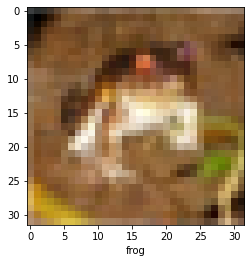

In [ ]:
plot_sample(X_train,y_train,0)

In [ ]:
X_train=X_train/255
X_test=X_test/255

First Neural network model with basic network (ANN)

NeTA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
NeTA=Sequential([
                 layers.Flatten(input_shape=(32,32,3)),
                 layers.Dense(200,activation='relu'),
                 layers.Dense(10,activation='softmax')
])

NeTA.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=NeTA.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8825 - accuracy: 0.3262 - val_loss: 1.8782 - val_accuracy: 0.3148
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7070 - accuracy: 0.4002 - val_loss: 1.6451 - val_accuracy: 0.4208
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6322 - accuracy: 0.4249 - val_loss: 1.6668 - val_accuracy: 0.4031
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5806 - accuracy: 0.4468 - val_loss: 1.6367 - val_accuracy: 0.4181
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5413 - accuracy: 0.4567 - val_loss: 1.5334 - val_accuracy: 0.4591
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5079 - accuracy: 0.4711 - val_loss: 1.5208 - val_accuracy: 0.4638
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4778 - accuracy: 0.4813 - val_loss: 1.4964 - val_accuracy:

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=NeTA.predict_classes(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.4999


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


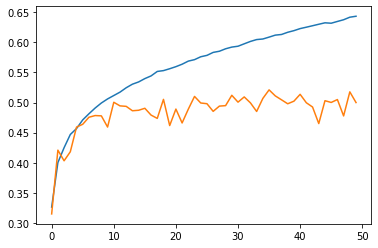

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

The first neural network is the simplest, in that it has no hidden layers.


NeTA


Train accuracy= 0.6442 , Test accuracy= 0.5263

NeTB

(*Flatten the image to a vector for the input
*Use a fully-connected linear layer with 300 hidden-neurons
*Use the ReLU activation function
*Use a fully-connected linear layer to the 10 outputs.)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,ReLU

In [ ]:
NeTB=Sequential([
                 layers.Flatten(input_shape=(32,32,3)),
                 layers.Dense(100,activation='relu'),
                 layers.Dense(300,activation='relu'),
                 layers.Dense(10,activation='softmax')
])

NeTB.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [ ]:
history1=NeTB.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9077 - accuracy: 0.3163 - val_loss: 1.7594 - val_accuracy: 0.3776
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7221 - accuracy: 0.3882 - val_loss: 1.6940 - val_accuracy: 0.3840
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6427 - accuracy: 0.4173 - val_loss: 1.6796 - val_accuracy: 0.3941
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5868 - accuracy: 0.4390 - val_loss: 1.6052 - val_accuracy: 0.4268
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5485 - accuracy: 0.4516 - val_loss: 1.5866 - val_accuracy: 0.4382
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5100 - accuracy: 0.4645 - val_loss: 1.5029 - val_accuracy: 0.4670
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4804 - accuracy: 0.4750 - val_loss: 1.4788 - val_accuracy:

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=NeTB.predict_classes(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.5293


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


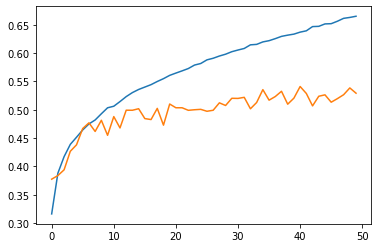

In [ ]:
print(history1.history.keys())
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

The second neural network is slightly more complicated in that it has a hidden layer with 300 neurons 
nodes and adds a non-linearity between the layers
NeTB


Train accuracy= 0.6644 , Test accuracy= 0.5344


as ANN dosen't work good with images we are getting low accuracy for train and test dataset

NeTC


(*Use a convolution layer with kernel-width 5 and depth 25
*Use the ReLU activation function
*Use a max-pool operation with kernel-width 2 and stride 2
*Flatten the image to a vector for the next step's input
*Use a fully-connected linear layer to the 10 outputs.)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout

In [ ]:
NeTC = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

NeTC.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

*As 50 epcohs is taking huge ram so while executing whole code its not getting executed so i reduced it to half and executed 

In [ ]:
history2= NeTC.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6071 - accuracy: 0.4204 - val_loss: 1.3496 - val_accuracy: 0.5105
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2772 - accuracy: 0.5452 - val_loss: 1.1833 - val_accuracy: 0.5744
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1544 - accuracy: 0.5925 - val_loss: 1.0975 - val_accuracy: 0.6158
Epoch 4/25
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0708 - accuracy: 0.6227 - val_loss: 1.0333 - val_accuracy: 0.6417
Epoch 5/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0241 - accuracy: 0.6417 - val_loss: 1.0303 - val_accuracy: 0.6551
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9808 - accuracy: 0.6580 - val_loss: 0.9604 - val_accuracy: 0.6661
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9447 - accuracy: 0.6712 - val_loss: 0.9440 - val_accuracy:

In [ ]:
NeTC.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8309 - accuracy: 0.7160


[0.8309029340744019, 0.7160000205039978]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


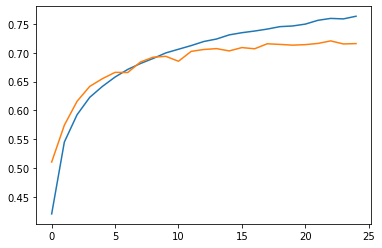

In [ ]:
print(history2.history.keys())
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

CNN gave us better accuracy then rest two ANN model because CNN neural network better with images

NeTC

train accuracy= 0.7676 , test accuracy = 0.7251

all the 3 neural network accuracy and visualization histories as follows


Text(0.5, 0, 'train accuracy= 0.7676 , test accuracy = 0.7251')

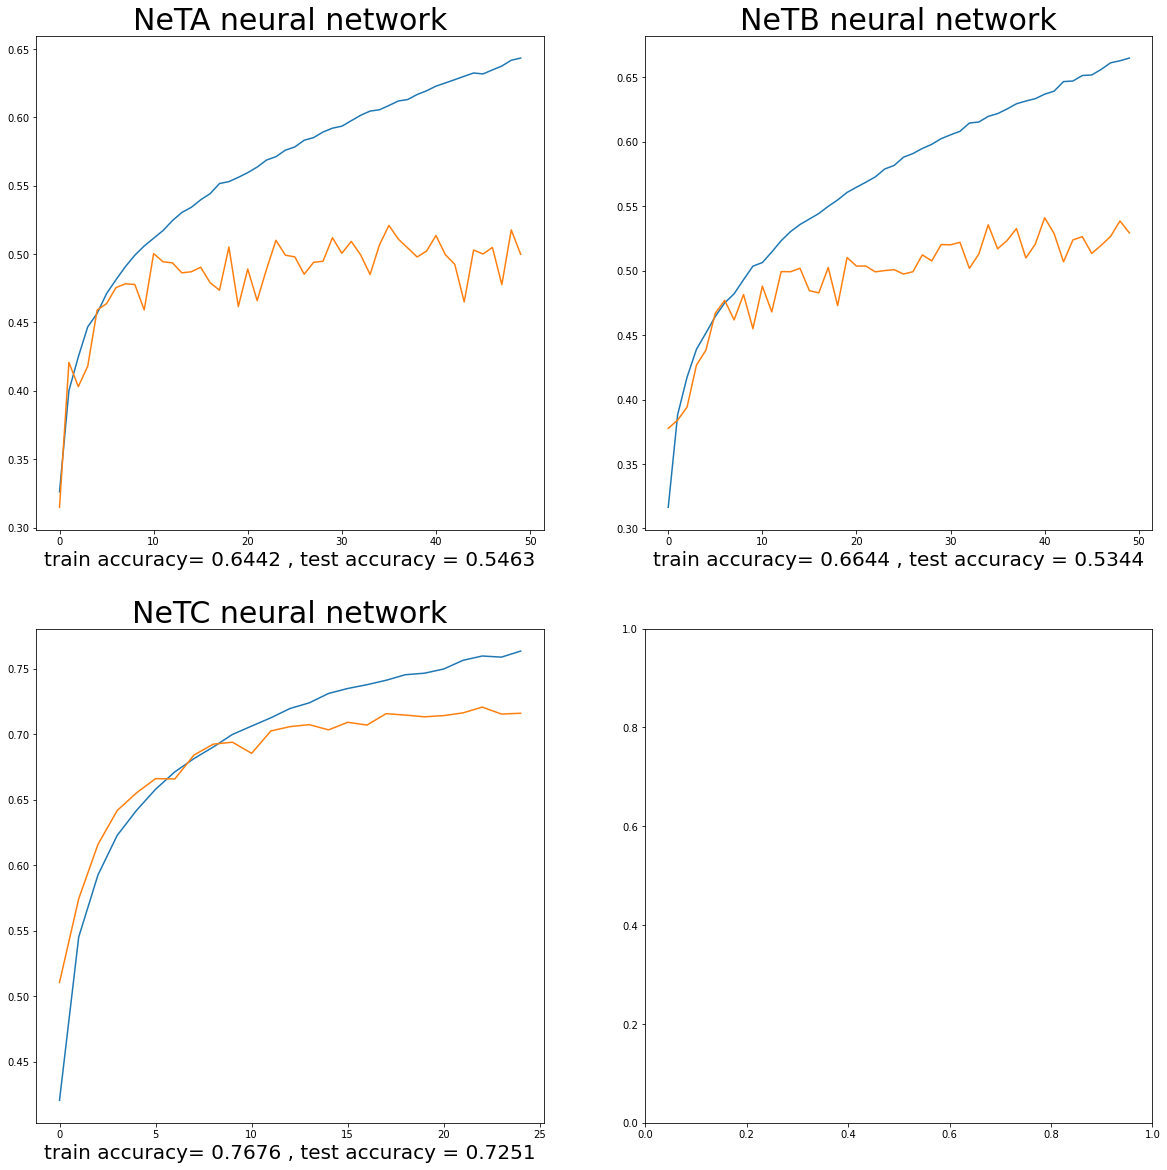

In [ ]:
figure,axis = plt.subplots(2, 2,figsize=(20,20))


axis[0,0].plot(history.history['accuracy'])
axis[0,0].plot(history.history['val_accuracy'])
axis[0,0].set_title("NeTA neural network",fontsize=30)
axis[0,0].set_xlabel("train accuracy= 0.6442 , test accuracy = 0.5463",fontsize=20)




axis[0,1].plot(history1.history['accuracy'])
axis[0,1].plot(history1.history['val_accuracy'])
axis[0,1].set_title("NeTB neural network",fontsize=30)
axis[0,1].set_xlabel("train accuracy= 0.6644 , test accuracy = 0.5344",fontsize=20)



axis[1,0].plot(history2.history['accuracy'])
axis[1,0].plot(history2.history['val_accuracy'])
axis[1,0].set_title("NeTC neural network",fontsize=30)
axis[1,0].set_xlabel("train accuracy= 0.7676 , test accuracy = 0.7251",fontsize=20)

